<a href="https://colab.research.google.com/github/MuskanChaddha/Analysis./blob/main/Muskan_chaddha_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kyra Fashions E-Mail Campaign Case Study

# Load Library & Data Preparation and Cleaning

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the dataset
file_path = "/content/digital_marketing_dataset.csv"
data = pd.read_csv(file_path)


In [32]:
# ---------------------------- Data Preparation and Cleaning -------------------------------

# Convert categorical variables to appropriate types
categorical_columns = ["address_category", "channel", "campaign_segment"]
data[categorical_columns] = data[categorical_columns].astype("category")

# Check for missing values
missing_values = data.isnull().sum()

# Removing Duplicates
duplicates_before = data.duplicated().sum()
data_cleaned = data.drop_duplicates()
duplicates_after = data_cleaned.duplicated().sum()


# Dataset Overview
dataset_overview = {
    "Total Rows": data_no_outliers.shape[0],
    "Total Columns": data_no_outliers.shape[1],
    "Column Names": list(data_no_outliers.columns),
    "Data Types": data_no_outliers.dtypes.astype(str).to_dict()
}

# Missing Values Summary
missing_values_summary = missing_values.to_frame(name="Missing Values")

# Duplicate Removal Summary
duplicates_summary = {
    "Duplicates Before": duplicates_before,
    "Duplicates After": duplicates_after,
    "Total Duplicates Removed": duplicates_before - duplicates_after
}

# Print Summaries in a Structured Format
print("\nDataset Overview")
for key, value in dataset_overview.items():
    print(f"- {key}: {value}")

print("\nMissing Values Summary")
print(missing_values_summary.to_string())

print("\nDuplicate Removal Summary")
for key, value in duplicates_summary.items():
    print(f"- {key}: {value}")


Dataset Overview
- Total Rows: 54227
- Total Columns: 11
- Column Names: ['months_since_last_purchase', 'history_spend', 'history_footwear', 'history_apparel', 'address_category', 'acquired_in_last_year', 'channel', 'campaign_segment', 'visit', 'conversion', 'spend']
- Data Types: {'months_since_last_purchase': 'int64', 'history_spend': 'float64', 'history_footwear': 'int64', 'history_apparel': 'int64', 'address_category': 'category', 'acquired_in_last_year': 'int64', 'channel': 'category', 'campaign_segment': 'category', 'visit': 'int64', 'conversion': 'int64', 'spend': 'float64'}

Missing Values Summary
                            Missing Values
months_since_last_purchase               0
history_spend                            0
history_footwear                         0
history_apparel                          0
address_category                         0
acquired_in_last_year                    0
channel                                  0
campaign_segment                         0

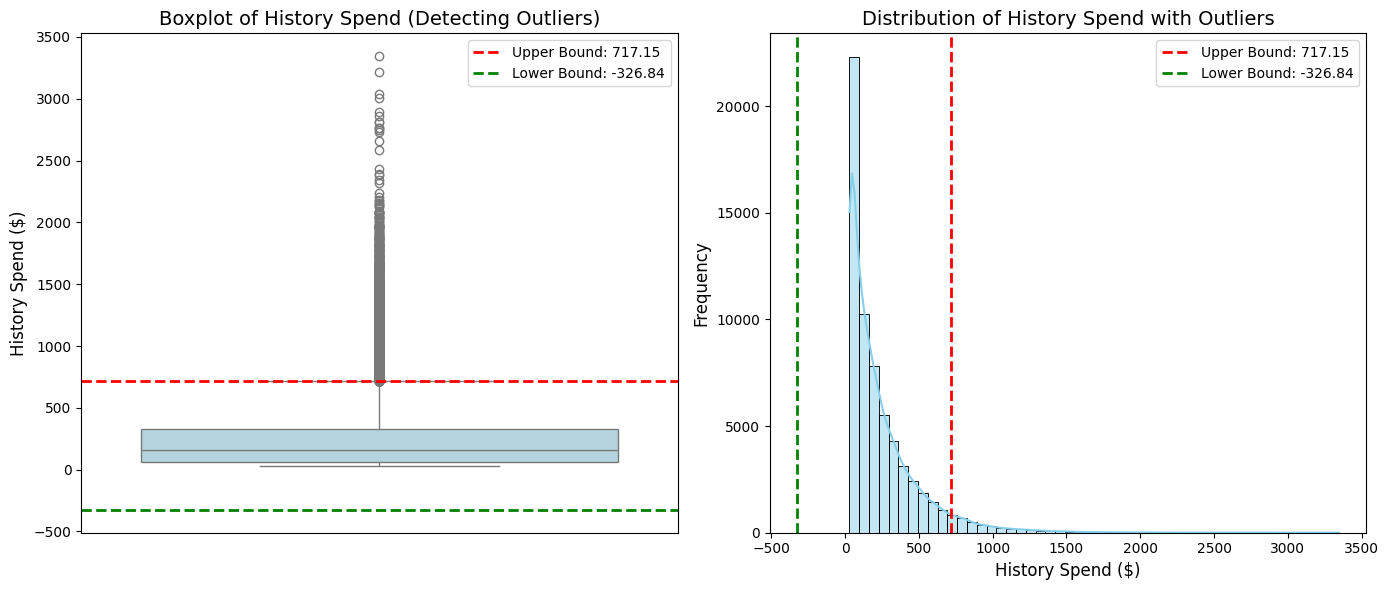


Outlier Detection Summary
- Lower Bound: -326.84
- Upper Bound: 717.15
- Total Outliers Identified: 3593


In [38]:
# Convert categorical variables to appropriate types
categorical_columns = ["address_category", "channel", "campaign_segment"]
data[categorical_columns] = data[categorical_columns].astype("category")

# Outlier Detection for 'history_spend' using Interquartile Range (IQR) method
Q1 = data['history_spend'].quantile(0.25)
Q3 = data['history_spend'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying Outliers
outliers = data[(data['history_spend'] < lower_bound) | (data['history_spend'] > upper_bound)]
outlier_count = outliers.shape[0]

# ---------------------------- Seaborn Outlier Visualization -------------------------------

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for Outliers
sns.boxplot(y=data["history_spend"], color="lightblue", showfliers=True, ax=axes[0])
axes[0].axhline(upper_bound, color='red', linestyle='dashed', linewidth=2, label=f'Upper Bound: {upper_bound:.2f}')
axes[0].axhline(lower_bound, color='green', linestyle='dashed', linewidth=2, label=f'Lower Bound: {lower_bound:.2f}')
axes[0].set_title("Boxplot of History Spend (Detecting Outliers)", fontsize=14)
axes[0].set_ylabel("History Spend ($)", fontsize=12)
axes[0].set_xticks([])  # Remove x-ticks for clarity
axes[0].legend()

# Histogram with KDE for Distribution of History Spend
sns.histplot(data["history_spend"], bins=50, kde=True, color="skyblue", ax=axes[1])
axes[1].axvline(upper_bound, color='red', linestyle='dashed', linewidth=2, label=f'Upper Bound: {upper_bound:.2f}')
axes[1].axvline(lower_bound, color='green', linestyle='dashed', linewidth=2, label=f'Lower Bound: {lower_bound:.2f}')
axes[1].set_title("Distribution of History Spend with Outliers", fontsize=14)
axes[1].set_xlabel("History Spend ($)", fontsize=12)
axes[1].set_ylabel("Frequency", fontsize=12)
axes[1].legend()

plt.tight_layout()
plt.show()

# Print Outlier Summary
print("\nOutlier Detection Summary")
print(f"- Lower Bound: {lower_bound:.2f}")
print(f"- Upper Bound: {upper_bound:.2f}")
print(f"- Total Outliers Identified: {outlier_count}")


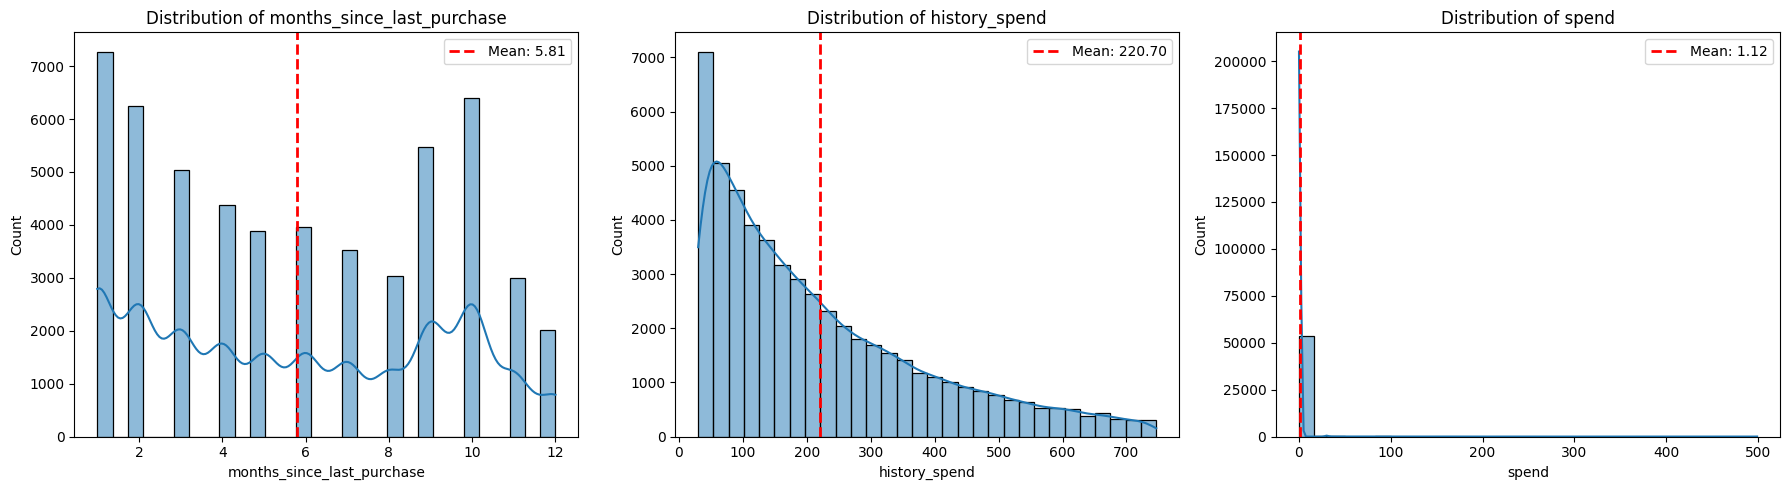

<ipython-input-25-5c2ad41c74ff>:22: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [25]:
# ---------------------------- Exploratory Data Analysis (EDA) -------------------------------

# Numerical Features Distribution with mean annotations
num_features = ["months_since_last_purchase", "history_spend", "spend"]
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(num_features):
    sns.histplot(data_no_outliers[col], bins=30, kde=True, ax=axes[i])
    mean_val = data_no_outliers[col].mean()
    axes[i].axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_val:.2f}")
    axes[i].legend()
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

# Checking skewness and kurtosis for insights
skewness = data_no_outliers[num_features].skew()
kurtosis = data_no_outliers[num_features].kurtosis()

# Campaign Performance Analysis
campaign_summary = data_no_outliers.groupby("campaign_segment").agg(
    total_customers=("campaign_segment", "count"),
    total_visits=("visit", "sum"),
    total_conversions=("conversion", "sum"),
    total_spend=("spend", "sum"),
    avg_spend_per_customer=("spend", "mean"),
    conversion_rate=("conversion", "mean")
).reset_index()

# Additional Metrics
campaign_summary["engagement_rate"] = campaign_summary["total_visits"] / campaign_summary["total_customers"]
campaign_summary["spend_per_conversion"] = np.where(campaign_summary["total_conversions"] > 0,
                                                    campaign_summary["total_spend"] / campaign_summary["total_conversions"],
                                                    0)





<ipython-input-24-48d98f325a93>:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




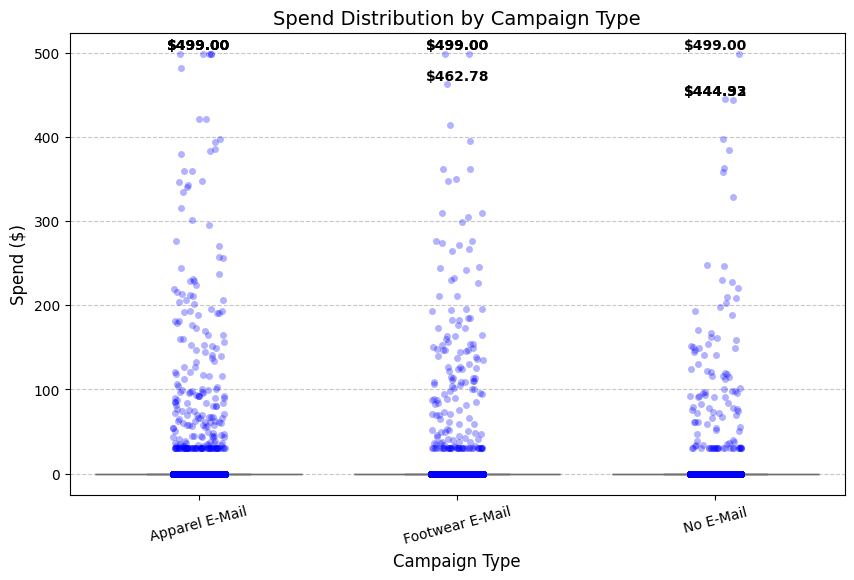

In [24]:
# ---------------------------- Visualizations -------------------------------

# Conversion Rate Visualization
fig1 = px.bar(campaign_summary, x="campaign_segment", y="conversion_rate", text="conversion_rate",
              title="Conversion Rates by Campaign Type", labels={"conversion_rate": "Conversion Rate", "campaign_segment": "Campaign Type"})
fig1.update_traces(texttemplate='%{text:.2%}', textposition='outside')
fig1.show()

# Engagement Rate Visualization
fig2 = px.bar(campaign_summary, x="campaign_segment", y="engagement_rate", text="engagement_rate",
              title="Engagement Rate by Campaign Type", labels={"engagement_rate": "Engagement Rate", "campaign_segment": "Campaign Type"})
fig2.update_traces(texttemplate='%{text:.2%}', textposition='outside')
fig2.show()

# Spend per Conversion Visualization
fig3 = px.bar(campaign_summary, x="campaign_segment", y="spend_per_conversion", text="spend_per_conversion",
              title="Spend per Conversion by Campaign Type", labels={"spend_per_conversion": "Spend per Conversion ($)", "campaign_segment": "Campaign Type"})
fig3.update_traces(texttemplate='$%{text:.2f}', textposition='outside')
fig3.show()

# Improved Spend Distribution Boxplot with Stripplot and Annotations
plt.figure(figsize=(10, 6))
sns.boxplot(x="campaign_segment", y="spend", data=data_no_outliers, showfliers=False, palette="pastel")
sns.stripplot(x="campaign_segment", y="spend", data=data_no_outliers, jitter=True, alpha=0.3, color="blue")

# Annotate high spenders (Top 3 per category)
for campaign in data_no_outliers["campaign_segment"].unique():
    subset = data_no_outliers[data_no_outliers["campaign_segment"] == campaign].nlargest(3, "spend")
    for _, row in subset.iterrows():
        plt.text(row["campaign_segment"], row["spend"] + 5, f"${row['spend']:.2f}",
                 horizontalalignment='center', color='black', fontweight='bold')

plt.title("Spend Distribution by Campaign Type", fontsize=14)
plt.xlabel("Campaign Type", fontsize=12)
plt.ylabel("Spend ($)", fontsize=12)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()


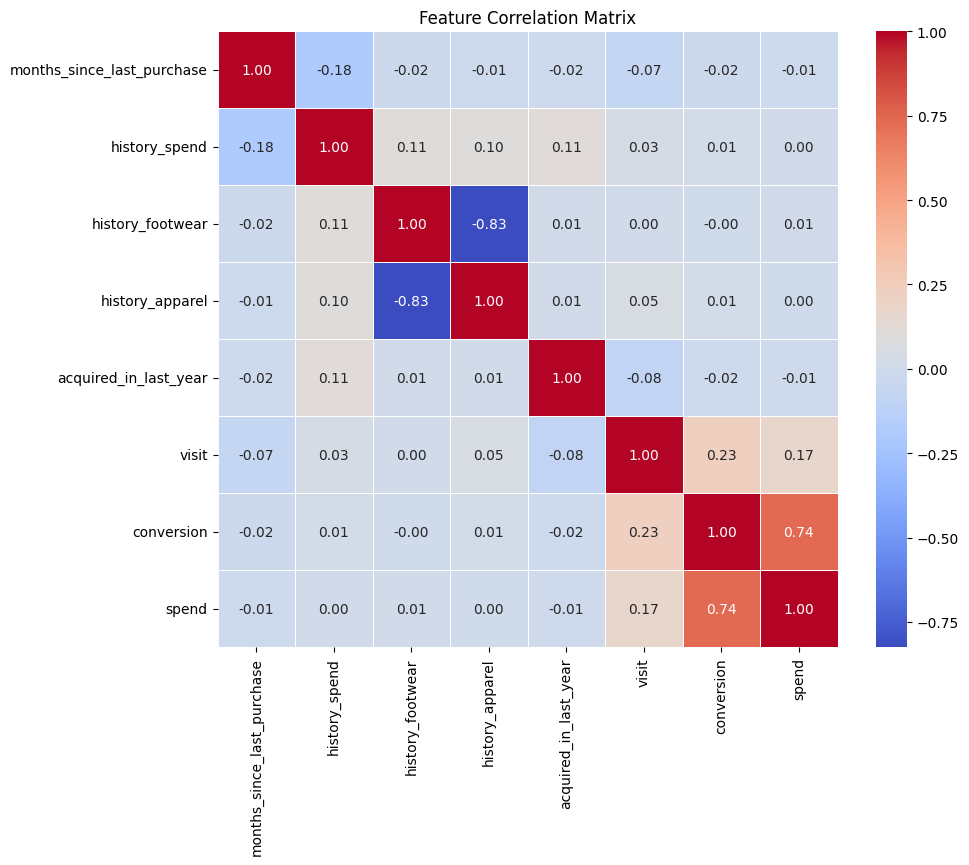

In [21]:
# Correlation Matrix
num_data = data_no_outliers.select_dtypes(include=["int64", "float64"])
plt.figure(figsize=(10, 8))
sns.heatmap(num_data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


In [26]:
# ---------------------------- Structured Summary Outputs -------------------------------

# Dataset Overview
dataset_overview = {
    "Total Rows": data_no_outliers.shape[0],
    "Total Columns": data_no_outliers.shape[1],
    "Column Names": list(data_no_outliers.columns),
    "Data Types": data_no_outliers.dtypes.astype(str).to_dict()
}

# Missing Values Summary
missing_values_summary = missing_values.to_frame(name="Missing Values")

# Duplicate Removal Summary
duplicates_summary = {
    "Duplicates Before": duplicates_before,
    "Duplicates After": duplicates_after,
    "Total Duplicates Removed": duplicates_before - duplicates_after
}

# Outlier Summary
outlier_summary = {
    "Outlier Column": "history_spend",
    "Lower Bound": round(lower_bound, 2),
    "Upper Bound": round(upper_bound, 2),
    "Total Outliers Removed": outlier_count
}

# Skewness and Kurtosis Summary
skewness_kurtosis_summary = pd.DataFrame({"Feature": num_features, "Skewness": skewness.values, "Kurtosis": kurtosis.values})

# Campaign Performance Summary
campaign_performance_summary = campaign_summary

# Print Summaries in a Structured Format
print("\nDataset Overview")
for key, value in dataset_overview.items():
    print(f"- {key}: {value}")

print("\nMissing Values Summary")
print(missing_values_summary.to_string())

print("\nDuplicate Removal Summary")
for key, value in duplicates_summary.items():
    print(f"- {key}: {value}")

print("\nOutlier Detection Summary")
for key, value in outlier_summary.items():
    print(f"- {key}: {value}")

print("\nSkewness & Kurtosis Summary")
print(skewness_kurtosis_summary.to_string(index=False))

print("\nCampaign Performance Summary")
print(campaign_performance_summary.to_string(index=False))


Dataset Overview
- Total Rows: 54227
- Total Columns: 11
- Column Names: ['months_since_last_purchase', 'history_spend', 'history_footwear', 'history_apparel', 'address_category', 'acquired_in_last_year', 'channel', 'campaign_segment', 'visit', 'conversion', 'spend']
- Data Types: {'months_since_last_purchase': 'int64', 'history_spend': 'float64', 'history_footwear': 'int64', 'history_apparel': 'int64', 'address_category': 'category', 'acquired_in_last_year': 'int64', 'channel': 'category', 'campaign_segment': 'category', 'visit': 'int64', 'conversion': 'int64', 'spend': 'float64'}

Missing Values Summary
                            Missing Values
months_since_last_purchase               0
history_spend                            0
history_footwear                         0
history_apparel                          0
address_category                         0
acquired_in_last_year                    0
channel                                  0
campaign_segment                         0

# Machine Learning Approach

A/B Testing (Chi-square Test) Results:
Chi-Square Statistic: 54.4949, P-Value: 0.0000

Top 10,000 Best Customers Selected.

Bottom 10,000 Least Engaged Customers Identified for Suppression.


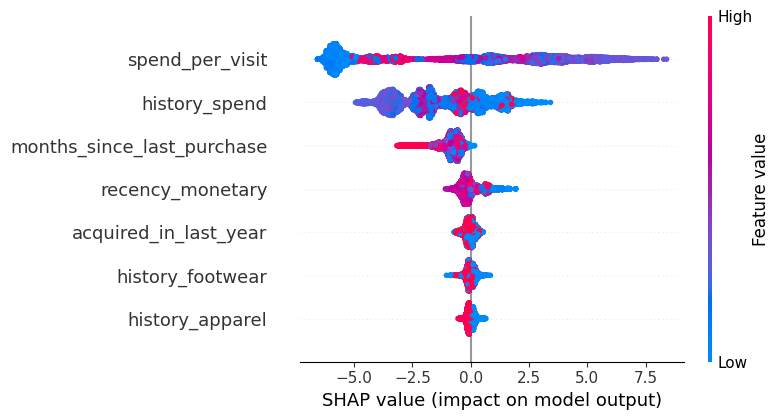

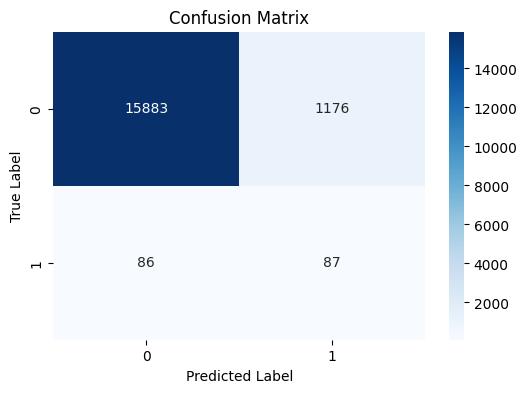


Optimized Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     17059
           1       0.07      0.50      0.12       173

    accuracy                           0.93     17232
   macro avg       0.53      0.72      0.54     17232
weighted avg       0.99      0.93      0.95     17232

Optimized ROC AUC Score: 0.9224


In [46]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_recall_curve
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.preprocessing import LabelEncoder, StandardScaler
import shap

# Load dataset
df = pd.read_csv('/content/digital_marketing_dataset.csv')

# =========================== Data Preprocessing ===========================
# Remove duplicates
df.drop_duplicates(inplace=True)

# Handle outliers in 'history_spend' using Winsorization
df['history_spend'] = np.clip(df['history_spend'], df['history_spend'].quantile(0.05), df['history_spend'].quantile(0.95))

# Encode categorical variables
label_encoder = LabelEncoder()
df['campaign_segment_encoded'] = label_encoder.fit_transform(df['campaign_segment'])

# Feature scaling
scaler = StandardScaler()
df[['months_since_last_purchase', 'history_spend']] = scaler.fit_transform(df[['months_since_last_purchase', 'history_spend']])

# Feature engineering
df['spend_per_visit'] = df['history_spend'] / (df['visit'] + 1)
df['recency_monetary'] = df['months_since_last_purchase'] * df['history_spend']

# =========================== A/B Testing for Statistical Validation ===========================

# Compare conversion rates between groups using chi-square test
conversion_rates = df.groupby("campaign_segment")["conversion"].mean()
campaign_counts = df["campaign_segment"].value_counts()

# Create a contingency table for chi-square test
contingency_table = pd.crosstab(df["campaign_segment"], df["conversion"])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("A/B Testing (Chi-square Test) Results:")
print(f"Chi-Square Statistic: {chi2:.4f}, P-Value: {p:.4f}")

# If p-value < 0.05, we conclude there is a significant difference in conversion rates.

# =========================== Customer Selection Strategy ===========================

# Select Top 10,000 Best Customers for Campaign
best_customers = df.sort_values(by=["history_spend", "visit", "conversion"], ascending=False).head(10000)
print("\nTop 10,000 Best Customers Selected.")

# Select Bottom 10,000 Customers for Suppression
worst_customers = df.sort_values(by=["history_spend", "visit", "conversion"], ascending=True).head(10000)
print("\nBottom 10,000 Least Engaged Customers Identified for Suppression.")

# =========================== Model Training for Feature Importance ===========================

# Define Features and Target
features = ['months_since_last_purchase', 'history_spend', 'spend_per_visit', 'recency_monetary', 'history_footwear', 'history_apparel', 'acquired_in_last_year']
X = df[features]
y = df['conversion']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Handle Class Imbalance using SMOTE + Tomek Links
smote = SMOTE(sampling_strategy=0.5, random_state=42)
tomek = TomekLinks()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
X_resampled, y_resampled = tomek.fit_resample(X_resampled, y_resampled)

# Train CatBoost Model
catboost_model = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.05, loss_function='Logloss', random_state=42, verbose=0)
catboost_model.fit(X_resampled, y_resampled)

# =========================== Feature Importance using SHAP ===========================
explainer = shap.Explainer(catboost_model)
shap_values = explainer(X_test)

# Plot Feature Importance
shap.summary_plot(shap_values, X_test)

# =========================== Model Evaluation ===========================

# Predict Probability Scores
predictions_proba = catboost_model.predict_proba(X_test)[:, 1]

# Precision-Recall Curve Analysis
precision, recall, thresholds = precision_recall_curve(y_test, predictions_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)
optimal_threshold = max(thresholds[np.argmax(f1_scores)] - 0.02, 0.12)

# Final Predictions based on optimal threshold
predictions_optimized = (predictions_proba >= optimal_threshold).astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions_optimized)

# Visualize Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print Classification Report & AUC Score
print("\nOptimized Classification Report:")
print(classification_report(y_test, predictions_optimized))
roc_score = roc_auc_score(y_test, predictions_proba)
print(f"Optimized ROC AUC Score: {roc_score:.4f}")



Checking for missing values:
months_since_last_purchase    0
history_spend                 0
history_footwear              0
history_apparel               0
address_category              0
acquired_in_last_year         0
channel                       0
campaign_segment              0
visit                         0
conversion                    0
spend                         0
dtype: int64

Class Distribution:
conversion
0    56860
1      578
Name: count, dtype: int64


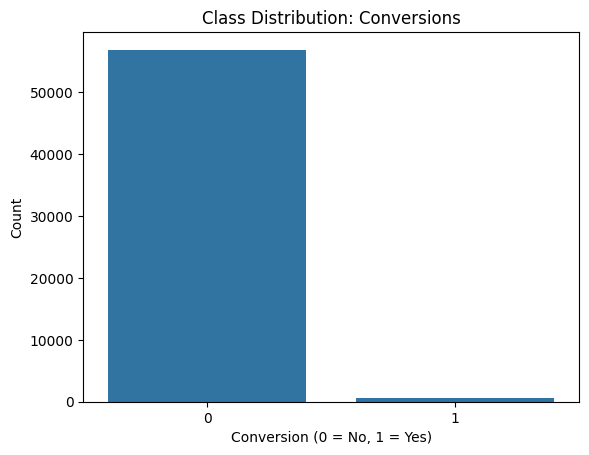

Adjusted Optimal Threshold: 0.4471790375270897

Optimized Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     17059
           1       0.06      0.14      0.09       173

    accuracy                           0.97     17232
   macro avg       0.53      0.56      0.54     17232
weighted avg       0.98      0.97      0.98     17232

Optimized ROC AUC Score: 0.7395


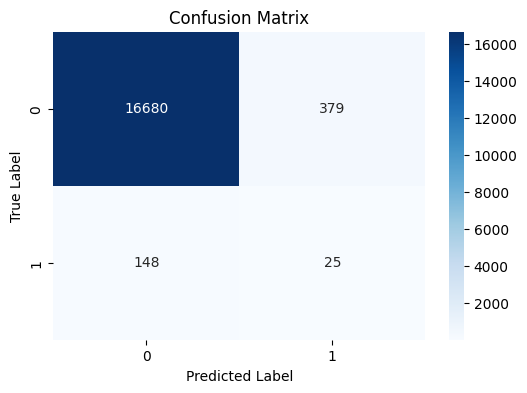

In [50]:
#Initial Aprpoach
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from scipy.stats.mstats import winsorize
from sklearn.decomposition import PCA

# =========================== Data Cleaning and Preprocessing ===========================

# Load dataset
df = pd.read_csv('digital_marketing_dataset.csv')

# Checking for missing values
print("Checking for missing values:")
print(df.isnull().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)

# Check dataset imbalance
target_counts = df['conversion'].value_counts()
print("\nClass Distribution:")
print(target_counts)
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title("Class Distribution: Conversions")
plt.xlabel("Conversion (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Handle outliers in 'history_spend' using Winsorization
df['history_spend'] = winsorize(df['history_spend'], limits=[0.05, 0.05])

# Encoding categorical variables
address_dummies = pd.get_dummies(df['address_category'], prefix='address', drop_first=True)
df_encoded = pd.concat([df, address_dummies], axis=1)

label_encoder = LabelEncoder()
df_encoded['channel_encoded'] = label_encoder.fit_transform(df_encoded['channel'])
df_encoded['campaign_segment_encoded'] = label_encoder.fit_transform(df_encoded['campaign_segment'])

# Drop original categorical columns
df_encoded.drop(['address_category', 'channel', 'campaign_segment'], axis=1, inplace=True)

# =========================== Feature Engineering ===========================

# Feature scaling
scaler = StandardScaler()
numerical_features = ['months_since_last_purchase', 'history_spend']
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# Create new features
df_encoded['spend_per_visit'] = df_encoded['history_spend'] / (df_encoded['visit'] + 1)
df_encoded['recency_monetary'] = df_encoded['months_since_last_purchase'] * df_encoded['history_spend']
df_encoded['purchase_recency_category'] = pd.cut(df_encoded['months_since_last_purchase'], bins=[0, 3, 6, 12], labels=["Recent", "Moderate", "Old"], include_lowest=True)
df_encoded = pd.get_dummies(df_encoded, columns=['purchase_recency_category'])

# Feature selection
features = ['months_since_last_purchase', 'history_spend', 'spend_per_visit', 'recency_monetary', 'history_footwear', 'history_apparel', 'acquired_in_last_year', 'channel_encoded', 'campaign_segment_encoded'] + list(address_dummies.columns) + [col for col in df_encoded.columns if 'purchase_recency_category' in col]
X = df_encoded[features]
y = df_encoded['conversion']

# Reduce dimensionality with PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

# =========================== Model Training and Evaluation ===========================

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)

# Address class imbalance with SMOTE + Tomek Links
smote = SMOTE(sampling_strategy=0.5, random_state=42)
tomek = TomekLinks()

# Apply resampling in sequence
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
X_resampled, y_resampled = tomek.fit_resample(X_resampled, y_resampled)

# Train CatBoost Model (Best for Imbalanced Data)
best_model = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.05, loss_function='Logloss', random_state=42, verbose=0)
best_model.fit(X_resampled, y_resampled)

# Evaluate the model
predictions_proba = best_model.predict_proba(X_test)[:, 1]

# Optimal Threshold using Precision-Recall tradeoff
precision, recall, thresholds = precision_recall_curve(y_test, predictions_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)
optimal_threshold = max(thresholds[np.argmax(f1_scores)] - 0.02, 0.12)
print(f"Adjusted Optimal Threshold: {optimal_threshold}")

# Re-evaluate optimized model with adjusted threshold
predictions_optimized = (predictions_proba >= optimal_threshold).astype(int)
print("\nOptimized Classification Report:")
print(classification_report(y_test, predictions_optimized))
roc_score = roc_auc_score(y_test, predictions_proba)
print(f"Optimized ROC AUC Score: {roc_score:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions_optimized)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()